<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 71.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826041 sha256=fe8fc02c5e6c8bb585b2fe5d3f86482db4d0279b9c26c549646952e951894571
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436294 sha256=e8972bad2332f7dca48f611fd90d37089a51d11d4335cbf027307861726b4672
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [411]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-SOL", interval="minute15", count=250)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                        open     high      low    close         volume  \
2023-04-17 03:00:00  31880.0  31950.0  31870.0  31930.0    2040.906670   
2023-04-17 03:15:00  31930.0  31960.0  31890.0  31890.0    1261.613012   
2023-04-17 03:30:00  31890.0  31990.0  31890.0  31970.0     870.923762   
2023-04-17 03:45:00  31960.0  32150.0  31920.0  32140.0    9096.499421   
2023-04-17 04:00:00  32150.0  32320.0  32070.0  32310.0   15857.853313   
...                      ...      ...      ...      ...            ...   
2023-04-19 16:15:00  31980.0  32060.0  31950.0  32030.0   11794.509761   
2023-04-19 16:30:00  32030.0  32070.0  32010.0  32060.0    5661.932292   
2023-04-19 16:45:00  32060.0  32070.0  31990.0  32010.0    8958.465981   
2023-04-19 17:00:00  32010.0  32010.0  30760.0  31160.0  124262.014266   
2023-04-19 17:15:00  31190.0  31220.0  31060.0  31160.0    3626.881989   

                            value  
2023-04-17 03:00:00  6.510510e+07  
2023-04-17 03:15:00  4.027983e+07  
202

In [412]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-17 03:00:00,31930.0
1,2023-04-17 03:15:00,31890.0
2,2023-04-17 03:30:00,31970.0
3,2023-04-17 03:45:00,32140.0
4,2023-04-17 04:00:00,32310.0
...,...,...
245,2023-04-19 16:15:00,32030.0
246,2023-04-19 16:30:00,32060.0
247,2023-04-19 16:45:00,32010.0
248,2023-04-19 17:00:00,31160.0


In [413]:
#prophet 불러옴
from fbprophet import Prophet

In [414]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [415]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


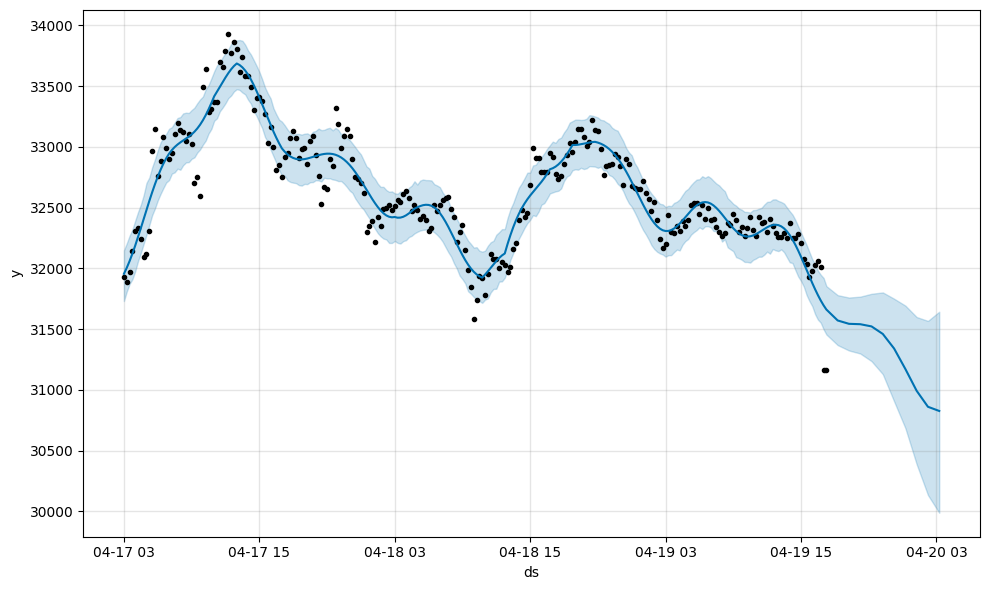

In [416]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


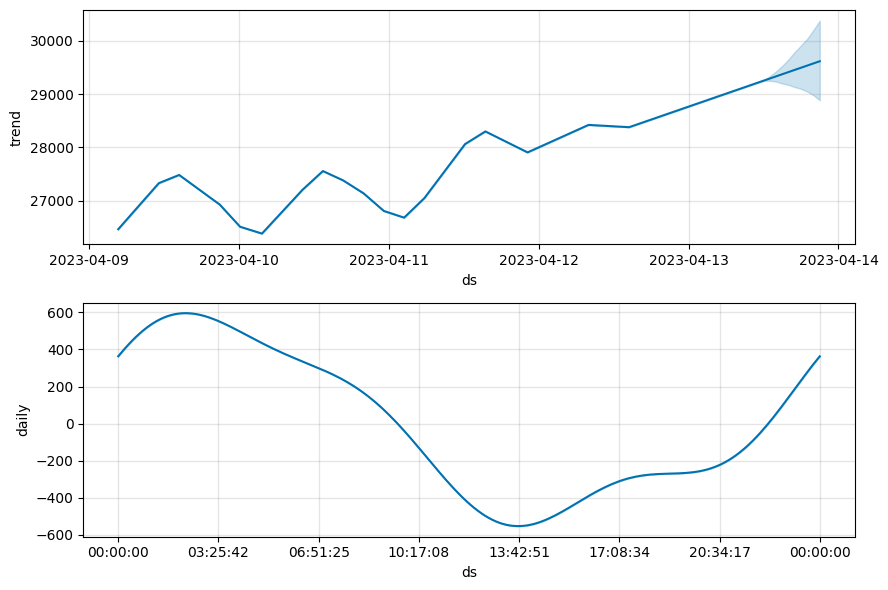

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored